In [178]:
import pandas as pd
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn import preprocessing

In [179]:
pwd

'C:\\Users\\Manish'

In [180]:
#TASK - 1

df = pd.read_csv("C:\\Users\\Manish\\criminal_san_francisco.csv")
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('Unnamed: 0.1', axis=1)

df

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,X,Y
0,2010-10-18 13:37:00,ASSAULT,BATTERY,Monday,SOUTHERN,NONE,-122.407376,37.779989
1,2013-01-11 03:21:00,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Friday,TENDERLOIN,NONE,-122.412437,37.783486
2,2004-03-31 15:00:00,ASSAULT,BATTERY,Wednesday,INGLESIDE,JUVENILE ADMONISHED,-122.451164,37.745564
3,2005-02-27 22:33:00,ASSAULT,THREATS AGAINST LIFE,Sunday,INGLESIDE,NONE,-122.428614,37.722765
4,2013-06-30 17:39:00,ASSAULT,BATTERY,Sunday,MISSION,NONE,-122.418449,37.753027
...,...,...,...,...,...,...,...,...
89995,2005-05-21 17:55:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Saturday,TARAVAL,"ARREST, BOOKED",-122.451157,37.716582
89996,2006-06-13 14:14:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Tuesday,CENTRAL,"ARREST, BOOKED",-122.407562,37.798678
89997,2004-12-08 20:20:00,WARRANTS,WARRANT ARREST,Wednesday,INGLESIDE,"ARREST, BOOKED",-122.417108,37.712256
89998,2009-11-11 07:40:00,WARRANTS,WARRANT ARREST,Wednesday,MISSION,"ARREST, BOOKED",-122.420010,37.770110


In [181]:
# convert the 'Date' column to datetime format
df['Dates']= pd.to_datetime(df['Dates'])
 
# Check the format of 'Date' column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Dates       90000 non-null  datetime64[ns]
 1   Category    90000 non-null  object        
 2   Descript    90000 non-null  object        
 3   DayOfWeek   90000 non-null  object        
 4   PdDistrict  90000 non-null  object        
 5   Resolution  90000 non-null  object        
 6   X           90000 non-null  float64       
 7   Y           90000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 5.5+ MB


In [182]:
df['Resolution'].nunique()

17

In [183]:
#TASK - 2

# categorical variables
df['Category'] = df.Category.astype('category')
df['Descript'] = df.Descript.astype('category')
df['DayOfWeek'] = df.DayOfWeek.astype('category')
df['PdDistrict'] = df.PdDistrict.astype('category')
df['Resolution'] = df.Resolution.astype('category')

In [184]:
# check missing values in train data
df[df.isnull().any(axis=1)]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,X,Y


In [185]:
# Encoding all the categorical features
cat_attr_list = ['Dates','Category',
                 'Descript','DayOfWeek',          
                 'PdDistrict','Resolution']
# though we have transformed all categoricals into their one-hot encodings, note that ordinal
# attributes such as hour, weekday, and so on do not require such encoding.
numeric_feature_cols = ['X','Y']
subset_cat_features =  ['Dates','Category','Descript','DayOfWeek','PdDistrict','Resolution','X','Y']


In [186]:
#Category

Category_dummies = pd.get_dummies(df.Category, prefix="category")
df_with_dummies = pd.concat([df,Category_dummies],axis='columns')
df_with_dummies.drop('Category',axis='columns',inplace=True)


# Descript

Descript_dummies = pd.get_dummies(df.Descript, prefix="Descript")
df_with_dummies = pd.concat([df,Descript_dummies],axis='columns')
df_with_dummies.drop('Descript',axis='columns',inplace=True)

#DayOfWeek

DayOfWeek_dummies = pd.get_dummies(df.DayOfWeek, prefix="DayOfWeek")
df_with_dummies = pd.concat([df,DayOfWeek_dummies],axis='columns')
df_with_dummies.drop('DayOfWeek',axis='columns',inplace=True)


#PdDistrict

PdDistrict_dummies = pd.get_dummies(df.PdDistrict, prefix="PdDistrict")
df_with_dummies = pd.concat([df,PdDistrict_dummies],axis='columns')
df_with_dummies.drop('PdDistrict',axis='columns',inplace=True)


#Resolution

Resolution_dummies = pd.get_dummies(df.Resolution, prefix="Resolution")
df_with_dummies = pd.concat([df,Resolution_dummies],axis='columns')
df_with_dummies.drop('Resolution',axis='columns',inplace=True)

df.head()                          

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,X,Y
0,2010-10-18 13:37:00,ASSAULT,BATTERY,Monday,SOUTHERN,NONE,-122.407376,37.779989
1,2013-01-11 03:21:00,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Friday,TENDERLOIN,NONE,-122.412437,37.783486
2,2004-03-31 15:00:00,ASSAULT,BATTERY,Wednesday,INGLESIDE,JUVENILE ADMONISHED,-122.451164,37.745564
3,2005-02-27 22:33:00,ASSAULT,THREATS AGAINST LIFE,Sunday,INGLESIDE,NONE,-122.428614,37.722765
4,2013-06-30 17:39:00,ASSAULT,BATTERY,Sunday,MISSION,NONE,-122.418449,37.753027


In [187]:
#Category
encoder_1 = preprocessing.LabelEncoder()

encoder_1.fit(df.Category)
print(encoder_1.classes_)
df.Category = encoder_1.transform(df.Category)

#Descript
encoder_1 = preprocessing.LabelEncoder()

encoder_1.fit(df.Descript)
print(encoder_1.classes_)
df.Descript = encoder_1.transform(df.Descript)

#DayOfWeek
encoder_1 = preprocessing.LabelEncoder()

encoder_1.fit(df.DayOfWeek)
print(encoder_1.classes_)
df.DayOfWeek = encoder_1.transform(df.DayOfWeek)

#PdDistrict
encoder_1 = preprocessing.LabelEncoder()

encoder_1.fit(df.PdDistrict)
print(encoder_1.classes_)
df.PdDistrict = encoder_1.transform(df.PdDistrict)

#Resolution                                             
encoder_1 = preprocessing.LabelEncoder()

encoder_1.fit(df.Resolution)
print(encoder_1.classes_)
df.Resolution = encoder_1.transform(df.Resolution)

df.head()

['ASSAULT' 'DRUG/NARCOTIC' 'LARCENY/THEFT' 'MISSING PERSON' 'ROBBERY'
 'SUSPICIOUS OCC' 'VANDALISM' 'VEHICLE THEFT' 'WARRANTS']
['AEROSOL CONTAINER; SALE, PURCHASE OR POSSESSION OF'
 'AGGRAVATED ASSAULT OF POLICE OFFICER, SNIPING'
 'AGGRAVATED ASSAULT OF POLICE OFFICER,BODILY FORCE'
 'AGGRAVATED ASSAULT ON POLICE OFFICER WITH A KNIFE'
 'AGGRAVATED ASSAULT WITH A DEADLY WEAPON' 'AGGRAVATED ASSAULT WITH A GUN'
 'AGGRAVATED ASSAULT WITH A KNIFE' 'AGGRAVATED ASSAULT WITH BODILY FORCE'
 'ASSAULT' 'ASSAULT BY POISONING'
 'ASSAULT ON A POLICE OFFICER WITH A DEADLY WEAPON'
 'ASSAULT WITH CAUSTIC CHEMICALS'
 'ASSAULT, AGGRAVATED, ON POLICE OFFICER, W/ GUN'
 'ASSAULT, AGGRAVATED, W/ GUN' 'ASSAULT, AGGRAVATED, W/ MACHINE GUN'
 'ATTEMPTED AUTO STRIP' 'ATTEMPTED GRAND THEFT FROM PERSON'
 'ATTEMPTED GRAND THEFT PICKPOCKET' 'ATTEMPTED GRAND THEFT PURSESNATCH'
 'ATTEMPTED HOMICIDE WITH A DANGEROUS WEAPON'
 'ATTEMPTED HOMICIDE WITH A GUN' 'ATTEMPTED HOMICIDE WITH A KNIFE'
 'ATTEMPTED HOMICIDE WITH BODI

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,X,Y
0,2010-10-18 13:37:00,0,63,1,7,11,-122.407376,37.779989
1,2013-01-11 03:21:00,0,4,0,9,11,-122.412437,37.783486
2,2004-03-31 15:00:00,0,63,6,2,6,-122.451164,37.745564
3,2005-02-27 22:33:00,0,264,3,2,11,-122.428614,37.722765
4,2013-06-30 17:39:00,0,63,3,3,11,-122.418449,37.753027


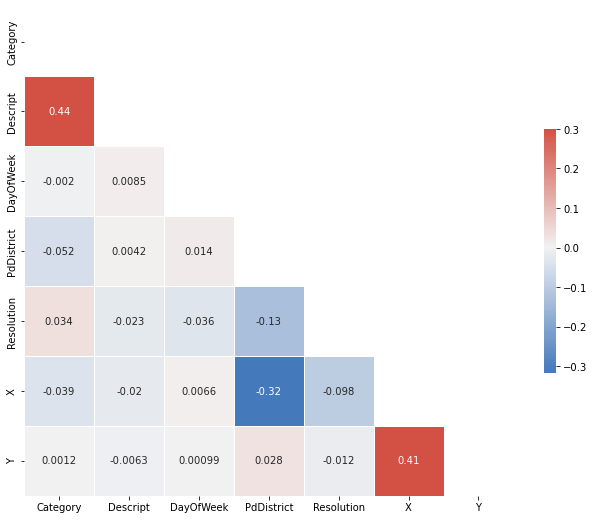

In [188]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [189]:
# detect correlations
column_correlation = df.corr()
column_correlation

,Category,Descript,DayOfWeek,PdDistrict,Resolution,X,Y
Category,1.000000,0.440915,-0.002024,-0.051740,0.034224,-0.038962,0.001200
Descript,0.440915,1.000000,0.008498,0.004240,-0.023240,-0.020407,-0.006292
DayOfWeek,-0.002024,0.008498,1.000000,0.013693,-0.035661,0.006558,0.000993
PdDistrict,-0.051740,0.004240,0.013693,1.000000,-0.133050,-0.318414,0.027583
Resolution,0.034224,-0.023240,-0.035661,-0.133050,1.000000,-0.097719,-0.012114
X,-0.038962,-0.020407,0.006558,-0.318414,-0.097719,1.000000,0.408489
Y,0.001200,-0.006292,0.000993,0.027583,-0.012114,0.408489,1.000000


In [190]:
# print information of all columns with datatypes of the dataset
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Dates       90000 non-null  datetime64[ns]
 1   Category    90000 non-null  category      
 2   Descript    90000 non-null  category      
 3   DayOfWeek   90000 non-null  category      
 4   PdDistrict  90000 non-null  category      
 5   Resolution  90000 non-null  category      
 6   X           90000 non-null  float64       
 7   Y           90000 non-null  float64       
dtypes: category(5), datetime64[ns](1), float64(2)
memory usage: 2.6 MB


In [191]:
df = df.drop(['Dates'], axis = 1)

In [192]:
y = df['Resolution']
X = df.drop('Resolution', axis=1)
print(y.value_counts())
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0) 
print(y_test.value_counts())
#clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
print(clf.score(X_test, y_test))

11    54100
0     24090
10     5790
1      2256
16     1078
7       798
3       427
4       371
8       280
12      177
15      170
6       160
5       135
13       95
9        37
2        32
14        4
Name: Resolution, dtype: int64
11    5387
0     2444
10     552
1      210
16     118
7       95
3       47
4       35
8       27
15      24
5       18
6       15
12      13
13       8
2        4
9        3
Name: Resolution, dtype: int64
0.7088888888888889


In [193]:
train_index

array([    0,     1,     2, ..., 84738, 84739, 84740])

# Cross Validation

In [194]:
kf = KFold(n_splits=5)
scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "max_iter":[10,50,100,500]}
    grid = {'criterion':['gini', 'entropy'],'max_depth': [2,4,6,8,10,12]}
    clf = tree.DecisionTreeClassifier()

    clf_cv=GridSearchCV(clf,grid, cv=5)
    clf_cv.fit(X_train,y_train)
    print("tuned hpyerparameters :(best parameters) ",clf_cv.best_params_)
    clf = tree.DecisionTreeClassifier(criterion=clf_cv.best_params_['criterion'], max_depth=clf_cv.best_params_['max_depth']).fit(X_train, y_train)
    s = clf.score(X_test, y_test)
    print(s)
    scores.append(s)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4}
0.6290555555555556
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 2}
0.12483333333333334
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4}
0.32155555555555554
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 2}
0.8803888888888889
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 2}
0.43483333333333335


In [195]:
np.array(scores).mean()

0.47813333333333335

# Stratified Cross Validation

In [196]:
skf = StratifiedKFold(n_splits=5)
scores = []
for train_index, test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "max_iter":[10,50,100,500]}
    
    grid = {'criterion':['gini', 'entropy'],'max_depth': [2,4,6,8,10,12]}
    clf = tree.DecisionTreeClassifier()

    clf_cv=GridSearchCV(clf,grid)
    clf_cv.fit(X_train,y_train)
    print("tuned hpyerparameters :(best parameters) ",clf_cv.best_params_)
    clf = tree.DecisionTreeClassifier(criterion=clf_cv.best_params_['criterion'], max_depth=clf_cv.best_params_['max_depth']).fit(X_train, y_train)
    s = clf.score(X_test, y_test)
    print(s)
    scores.append(s)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4}
0.396
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4}
0.7188333333333333
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 2}
0.6846111111111111
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4}
0.9069444444444444
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 2}
0.3318888888888889


In [197]:
np.array(scores).mean()

0.6076555555555555

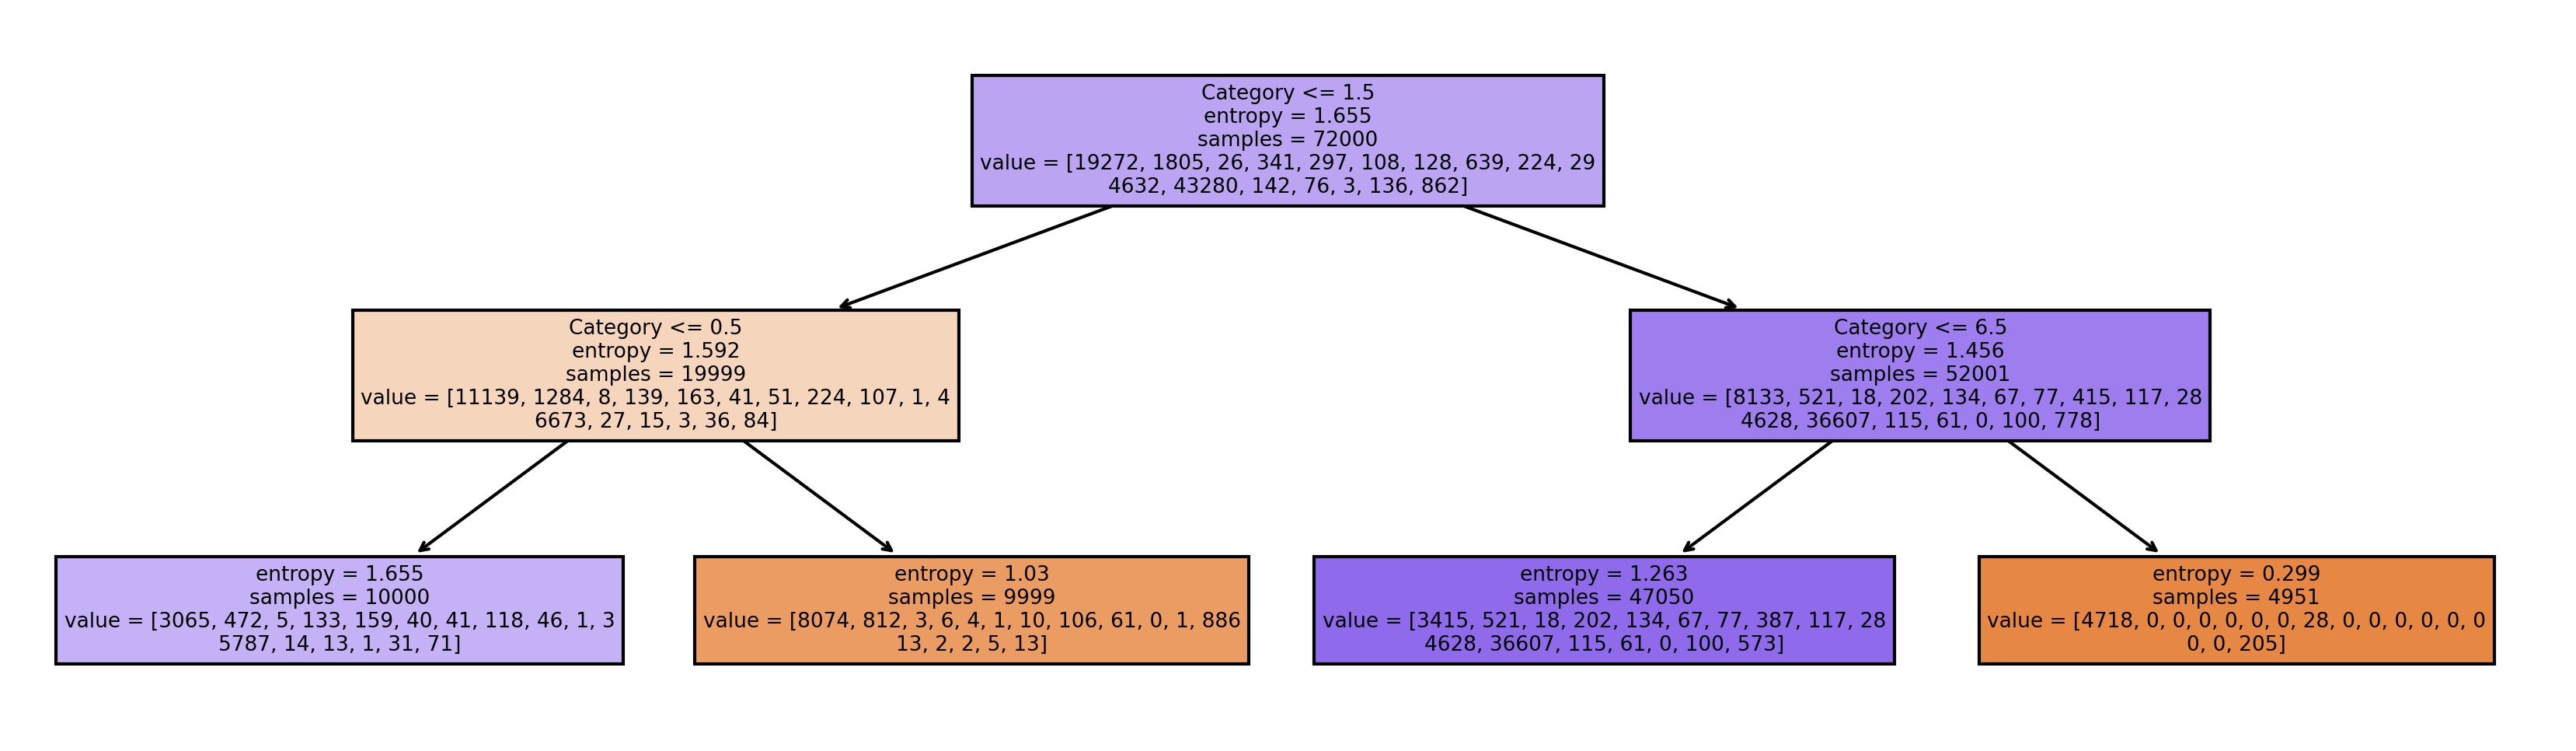

In [198]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

fig, axes = plt.subplots(1, 1,figsize = (14,4),dpi=300)
tree.plot_tree(clf,feature_names = X_train.columns,filled = True);
plt.show()